## Codes for JIA synovium study 

*Jun Inamo*

*jun.inamo@cuanschutz.edu*

*Computational Omics and Systems Immunology (COSI) Lab, Division of Rheumatology and Center for Health AI, University of Colorado School of Medicine, CO, USA*


In [1]:
format(Sys.Date(), "%Y-%m-%d")

[1] "2025-07-08"

In [2]:
options(warn = -1)  
options("verbose" = FALSE)
options("show.error.messages" = TRUE)  
Sys.setlocale("LC_CTYPE", "en_US.UTF-8")

[1] "en_US.UTF-8"

In [3]:
suppressMessages({
    source("./utils.R")
    library(gridExtra)
})

Load Seurat object of QCed data

In [4]:
ste = readRDS(paste0("./output/Xenium_merged_final.rds"))
DefaultAssay(ste) = "SCT"

Assign annotated cluster names

In [5]:


celltype="ALL"
resolution <- switch(celltype,
                     "ALL" = "0.20",
                     "T" = "1.00",
                     "M" = "0.20",
                     "B" = "0.40",
                     "Tissue" = "0.60"
)

cluster_col = "res_subtype" 
Idents(ste) = factor(ste@meta.data[,cluster_col])
DefaultAssay(ste) = "SCT"

cluster_df = read.csv("./cluster_annotation.csv")

cluster_COLORS <- manual_colors[1:length(unique(Idents(ste)))]
names(cluster_COLORS) = levels(Idents(ste))

cur_levels <- levels(Idents(ste))
df <- data.frame(level = cur_levels, stringsAsFactors = FALSE)
df$prefix <- sub("^([^-]+)-.*", "\\1", df$level)
df$num <- as.integer(sub("^[^-]+-(\\d+):.*", "\\1", df$level))
prefix_order <- c("T", "B", "M", "Tissue")
df$prefix_factor <- factor(df$prefix, levels = prefix_order)
df_sorted <- df[order(df$prefix_factor, df$num), ]
new_levels <- df_sorted$level
Idents(ste) <- factor(Idents(ste), levels = new_levels)

T_grad <- colorRampPalette(c("#ACD9AE99", "#358A3999"))(25)
Tissue_grad <- colorRampPalette(c("#FFEBED99", "#B71B1B99"))(25)
B_grad <- colorRampPalette(c("#C8B9E599", "#311A9299"))(25)
M_grad <- colorRampPalette(c("gold", "goldenrod3"))(25)
cluster_COLORS_ = c(T_grad[1:length(grep("^T-",levels(Idents(ste))))],
                    B_grad[1:length(grep("^B-",levels(Idents(ste))))],
                    M_grad[1:length(grep("^M-",levels(Idents(ste))))],
                    Tissue_grad[1:length(grep("^Tissue-",levels(Idents(ste))))])
names(cluster_COLORS_) = levels(Idents(ste))
cluster_COLORS_[grepl("venule",names(cluster_COLORS_))] = "grey40"
cluster_COLORS_[grepl("arteriolar",names(cluster_COLORS_))] = "grey70"
cluster_COLORS_[grepl("lymphatic",names(cluster_COLORS_))] = "grey90"
cluster_COLORS_[grepl("mixed",names(cluster_COLORS_))] = "white"

clus = ste@meta.data[,cluster_col] %>% 
  unique() %>%
  stringr::str_split(.,pattern = ":", simplify = TRUE) %>%
  .[,2]
cluster_COLORS__ = manual_colors
names(cluster_COLORS__) = clus
cluster_COLORS__ = na.omit(cluster_COLORS__)

cluster_colors_df <- data.frame(
  cluster =  ste@meta.data[,cluster_col] %>% 
    unique(),
  color = cluster_COLORS__[!is.na(names(cluster_COLORS__))],
  stringsAsFactors = FALSE
)

cluster_colors_df$clean_name <- sub("^[^:]+:", "", cluster_colors_df$cluster)

cluster_colors_mod_df <- data.frame(
  cluster = names(cluster_COLORS_),
  color = cluster_COLORS_,
  stringsAsFactors = FALSE
)

cluster_colors_mod_df$clean_name <- sub("^[^:]+:", "", cluster_colors_mod_df$cluster)

replace_indices <- cluster_colors_df$clean_name %in% cluster_colors_df$clean_name

cluster_colors_df$color[replace_indices] <- cluster_colors_mod_df$color[match(cluster_colors_df$clean_name[replace_indices], cluster_colors_mod_df$clean_name)]

cluster_COLORS__ <- setNames(cluster_colors_df$color, cluster_colors_df$clean_name)


ste@meta.data$new_cluster = factor(stringr::str_split(ste@meta.data$res_subtype,pattern=":",simplify=TRUE)[,2], 
                                   levels = unique(stringr::str_split(levels(Idents(ste)),pattern=":",simplify=TRUE)[,2])) 
Idents(ste) = ste@meta.data$new_cluster

ord = levels(Idents(ste))
ord = c(ord[!grepl("venule|arteriolar|lymphatic|mixed",ord)],
        ord[grepl("venule|arteriolar|lymphatic|mixed",ord)])
Idents(ste) = factor(Idents(ste), levels = ord)
ord = levels(Idents(ste))
ord = c(ord[!grepl("mixed",ord)],
        ord[grepl("mixed",ord)])
Idents(ste) = factor(Idents(ste), levels = ord)

cluster_COLORS__ = cluster_COLORS__[levels(Idents(ste))]
cluster_COLORS__tmp = cluster_COLORS__
names(cluster_COLORS__tmp) = c("CD4 naïve","CD4 memory","Treg","TPH_TFH","Th1-like Tph",
                               "CD8 naïve","GZMK+ CD8","GZMB+ CD8","IFN stimulated CD8 memory","TRM","Innate-like T",
                               "gdT",
                               "ILCs",
                               "NK cells",
                               "B","plasmablast","plasma",
                               "MERTK+ macrophage","TREM2+ macrophage","pro-inflammatory  macrophage","stressed macrophage",
                               "DC1","DC2","pDC","mregDC","mast cell",
                               "proliferating cells",
                               "PRG4+ lining fibroblast","PRG4+DKK3+ lining fibroblast",
                               "CXCL12+DKK3+ intermediate fibroblast","RSPO3+ intermediate fibroblast",
                               "POSTN+ sublining fibroblast","NOTCH3+ sublining fibroblast","CD34+PI16+DPP4+ sublining","CXCL12+ sublining fibroblast",
                               "muscle",
                               "venule","NOTCH4+ arteriolar","lymphatic",
                               "mixed")
cluster_COLORS__ = cluster_COLORS__tmp
cluster_COLORS__[names(cluster_COLORS__)=="NK cells"]="turquoise"
cluster_COLORS__[names(cluster_COLORS__)=="ILCs"]="darkblue"
Idents(ste) = factor(Idents(ste), levels = names(cluster_COLORS__))

cluster_col = "new_cluster"

In [6]:
table(Idents(ste))
sum(table(Idents(ste)))


                           CD4 naïve                           CD4 memory 
                                 624                                 5828 
                                Treg                              TPH_TFH 
                                2150                                 1828 
                        Th1-like Tph                            CD8 naïve 
                                 793                                 3425 
                           GZMK+ CD8                            GZMB+ CD8 
                                9680                                  477 
           IFN stimulated CD8 memory                                  TRM 
                                 794                                 1463 
                       Innate-like T                                  gdT 
                                 895                                 2210 
                                ILCs                             NK cells 
                        

[1] 430119

### Function to identify niche
Almost the same as the BuildNicheAssay function in Seurat, but it has been modified slightly to apply to different slides in order to identify the corresponding niche.

```r

ste <- BuildNicheAssay_(object = ste, 
                        group.by = cluster_col,
                        neighbors.k = 30, 
                        connectivity_key = "nn",
                        niches.k = 30)
                        
```

In [7]:

mat = prop.table(table(ste@meta.data[,cluster_col], ste$niches), 2) %>% round(2) * 100
mat = mat[rownames(mat)!="mixed",]
mat = mat[rownames(mat)!="muscle",]
mat = mat[rownames(mat)!="proliferating cells",]
mat

                                      
                                        1  2  3  4  5  6  7  8  9 10 11 12 13
  CD4 memory                            2  1  1  0  2  0  1  1  4  0  1  0  2
  GZMK+ CD8                             2  1  4  0  6  0  3  1  6  0  2  0  2
  CD8 naïve                             1  0  0  0  0  0  0  0  9  0  0  0  2
  gdT                                   1  0  0  0  1  0  0  0  1  0  0  0  0
  Treg                                  1  0  0  0  1  0  1  0  2  0  0  0  1
  TPH_TFH                               1  0  0  0  1  0  0  0  2  0  0  0  2
  ILCs                                  0  0  0  0  0  0  0  0  0  0  0  0  0
  TRM                                   0  0  0  0  1  0  0  0  0  0  0  0  0
  NK cells                              0  0  0  0  0  0  0  0  1  0  0  0  0
  Innate-like T                         0  0  0  0  0  0  0  0  0  0  0  0  0
  IFN stimulated CD8 memory             0  0  0  0  0  0  0  0  0  0  0  0  0
  Th1-like Tph           

In [8]:

mat_wide <- mat %>%
  as.data.frame() %>%
  tidyr::pivot_wider(names_from = Var1, values_from = Freq, values_fill = 0) %>%
  tibble::column_to_rownames("Var2")  # Var2（niche番号）を rownames に

# PCA
set.seed(1234)
pca_res <- prcomp(mat_wide, scale. = TRUE)

pca_df <- as.data.frame(pca_res$x)
pca_df$niche <- rownames(pca_df)

library(cluster)

explained_var <- summary(pca_res)$importance[3, ]  # Cumulative Proportion
optimal_pcs <- which(explained_var >= 0.3)[1]
cat("Optimal number of PCs:", optimal_pcs, "\n")

sil_width <- sapply(2:15, function(k){
  km.res <- kmeans(pca_res$x[, 1:optimal_pcs], centers = k, nstart = 10)
  ss <- silhouette(km.res$cluster, dist(pca_res$x[, 1:optimal_pcs]))
  mean(ss[, 3])
})


optimal_k <- which.max(sil_width) + 1
cat("Optimal number of clusters (k):", optimal_k, "\n")

k_clust <- kmeans(pca_res$x[, 1:optimal_pcs], centers = optimal_k)
pca_df$group <- factor(k_clust$cluster)

Optimal number of PCs: 3 
Optimal number of clusters (k): 4 


Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’

Registered S3 methods overwritten by 'ggalt':
  method                  from   
  grid.draw.absoluteGrob  ggplot2
  grobHeight.absoluteGrob ggplot2
  grobWidth.absoluteGrob  ggplot2
  grobX.absoluteGrob      ggplot2
  grobY.absoluteGrob      ggplot2



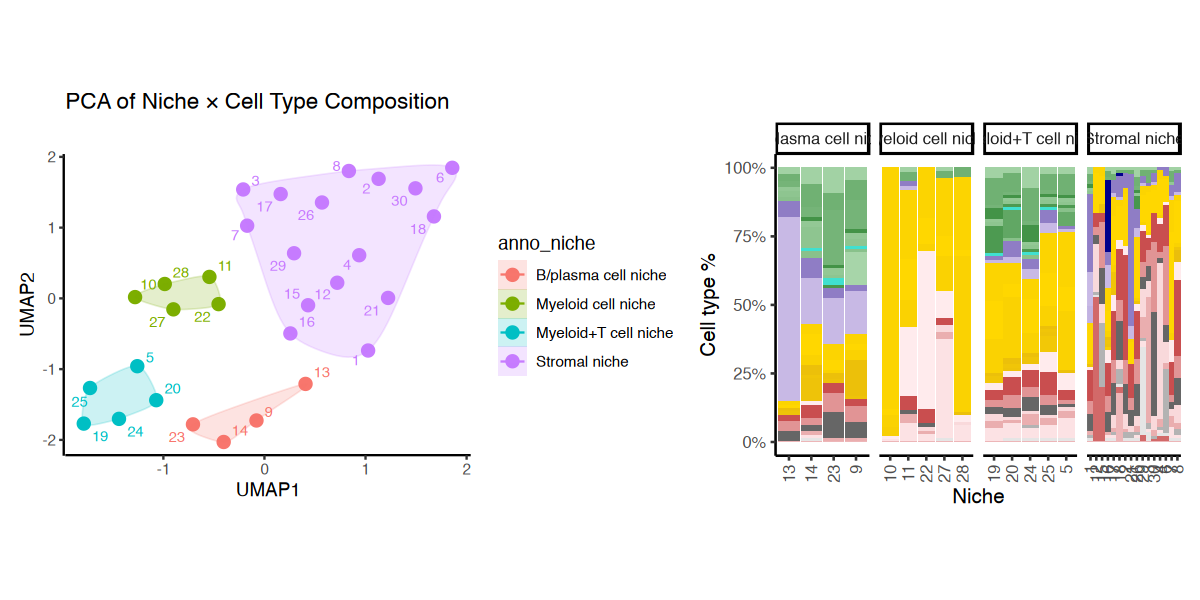

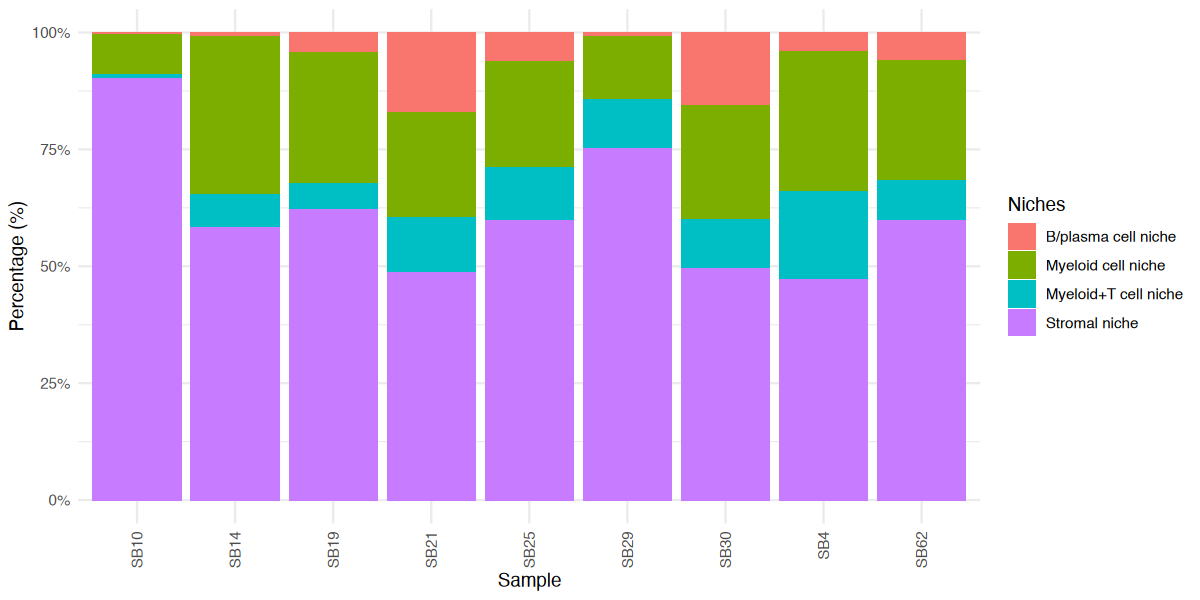

In [9]:
mat_grouped <- mat %>%
  as.data.frame() %>%
  mutate(niche = as.character(Var2)) %>%
  left_join(pca_df, by = "niche")  


niche_labels <- tibble(
  niche = as.character(c(
    1,2,3,4,6,7,8,12,15,16,17,18,21,26,29,30,
    19,20,24,25,5,
    10,11,22,27,28,
    13,14,23,9
  )),
  anno_niche = c(
    rep("Stromal niche", 16),
    rep("Myeloid+T cell niche", 5),
    rep("Myeloid cell niche", 5),
    rep("B/plasma cell niche", 4)
  )
) %>%
  as.data.frame()

pca_df$anno_niche <- niche_labels$anno_niche[match(pca_df$niche, niche_labels$niche)]

umap_res = uwot::umap(pca_res$x[, 1:optimal_pcs], n_neighbors = 15, min_dist = 0.1, metric = "euclidean")
pca_df$UMAP1 = umap_res[,1]
pca_df$UMAP2 = umap_res[,2]
g1 = ggplot(pca_df, aes(x = UMAP1, y = UMAP2, color = anno_niche, fill = anno_niche, label = niche)) +
  geom_point(size = 3) +
  geom_text_repel(aes(label = niche), size = 3, show.legend = FALSE) +
  ggalt::geom_encircle(s_shape=0.5, expand=0, alpha = 0.2) +
  coord_fixed(ratio = 0.7) +
  theme_classic() +
  labs(title = "PCA of Niche × Cell Type Composition")

g2 = mat_grouped %>%
  dplyr::left_join(niche_labels, by = "niche") %>%
  group_by(anno_niche, niche) %>%
  mutate(prop = Freq / sum(Freq)) %>%
  ungroup() %>%
  ggplot(aes(x = niche, y = prop, fill = Var1)) +
  geom_bar(stat = "identity", position = "stack", width = 0.9) +
  ggh4x::facet_nested_wrap(vars(anno_niche), scales = "free_x", nrow = 1) +
  scale_y_continuous(labels = scales::percent_format(scale = 100)) +
  labs(x = "Niche", y = "Cell type %", fill = "Cell type") +
  scale_fill_manual(values = cluster_COLORS__, breaks = names(cluster_COLORS__)) +
  theme_classic2() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5),
        legend.position = "none")

options(repr.plot.width = 10, repr.plot.height = 5)
plot(g1 | g2)


ste$anno_niche = dplyr::left_join(ste@meta.data %>%
                                    dplyr::mutate(niche = as.character(niches)),
                                  pca_df[,c("niche","anno_niche")],
                                  by="niche") %>%
  .$anno_niche

Idents(ste) = factor(ste@meta.data$anno_niche, levels = c("B/plasma cell niche",
                                                          "Myeloid cell niche",
                                                          "Myeloid+T cell niche",
                                                          "Stromal niche"))

cluster_stats <- Cluster_Stats_All_Samples(seurat_object = ste, group_by_var = "sample_id")

g = cluster_stats[,grep("%$",colnames(cluster_stats),invert = TRUE)] %>%
  dplyr::select(-Number, -Freq) %>%  # 不要な列を削除
  tidyr::pivot_longer(cols = -Cluster, names_to = "Sample", values_to = "Value") %>%
  dplyr::filter(Cluster %in% levels(Idents(ste))) %>%
  dplyr::group_by(Sample) %>%
  dplyr::mutate(Percentage = Value / sum(Value) * 100) %>%
  dplyr::ungroup() %>%
  na.omit() %>%
  ggplot(., aes(x = Sample, y = Percentage, fill = factor(Cluster))) +
  geom_bar(stat = "identity") +
  scale_y_continuous(labels = scales::percent_format(scale = 1)) +
  labs(x = "Sample", y = "Percentage (%)", fill = "Niches") +
  #scale_color_manual(values = manual_colors) +
  #scale_fill_manual(values = manual_colors) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5))

options(repr.plot.width = 10, repr.plot.height = 5)
plot(g)



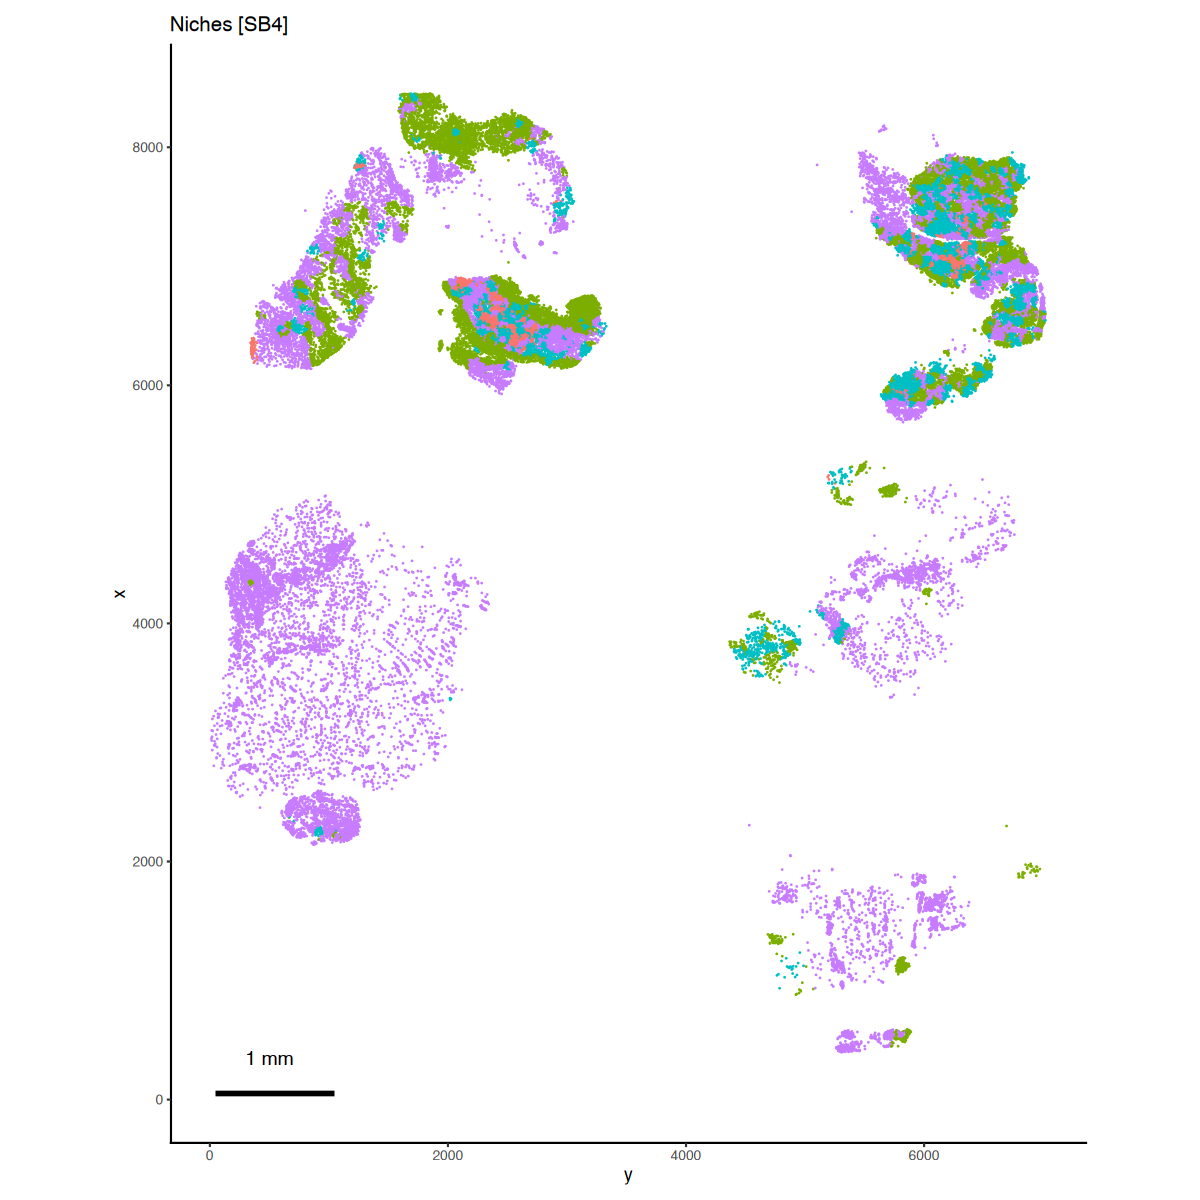

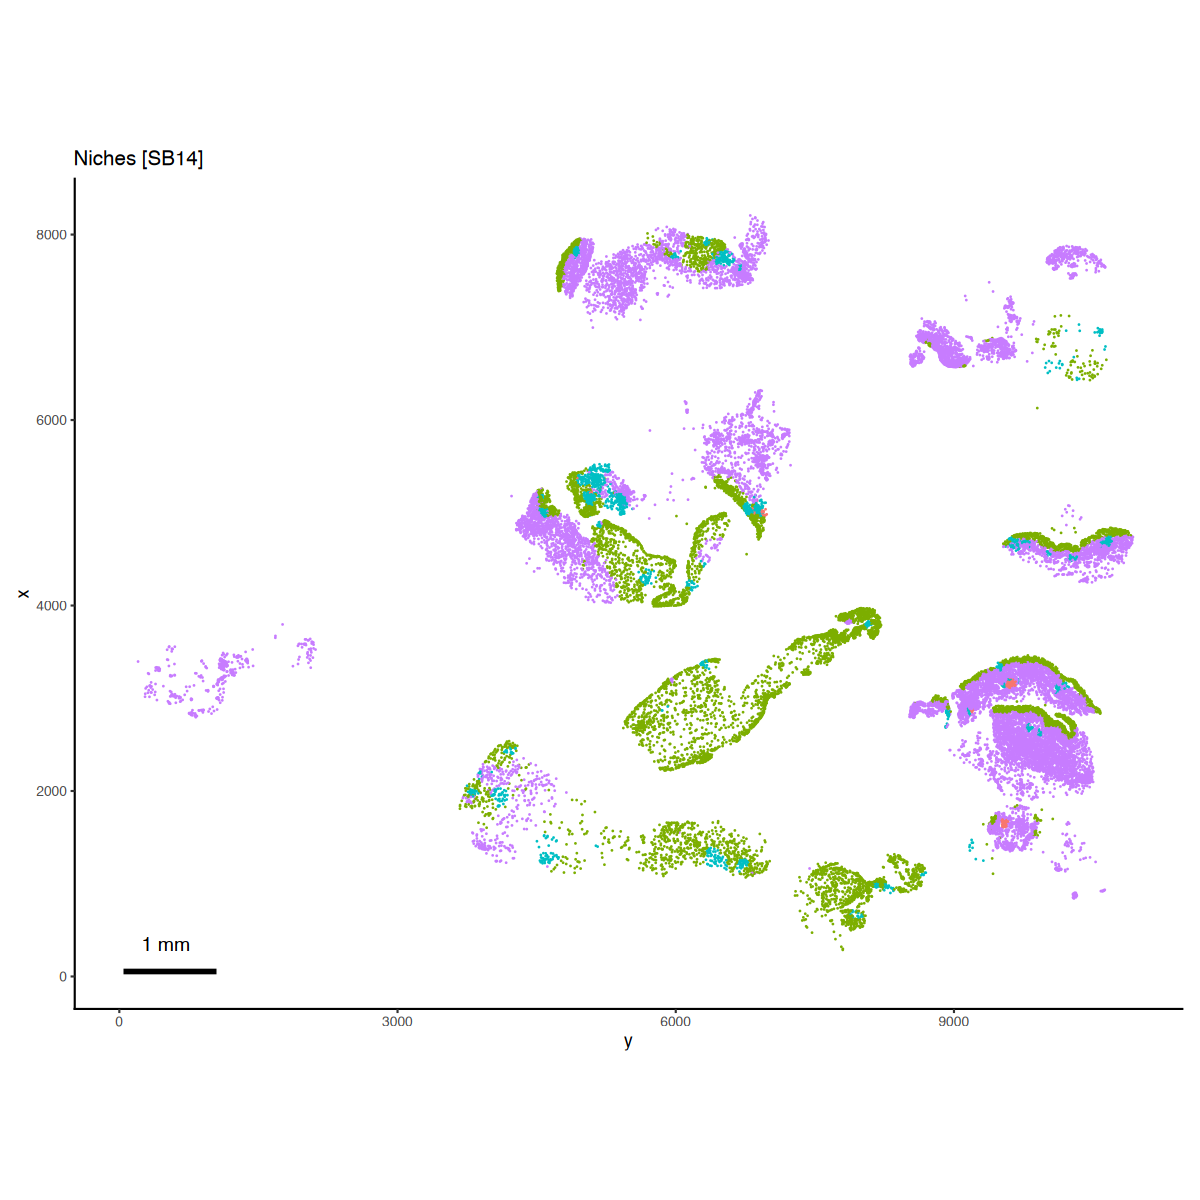

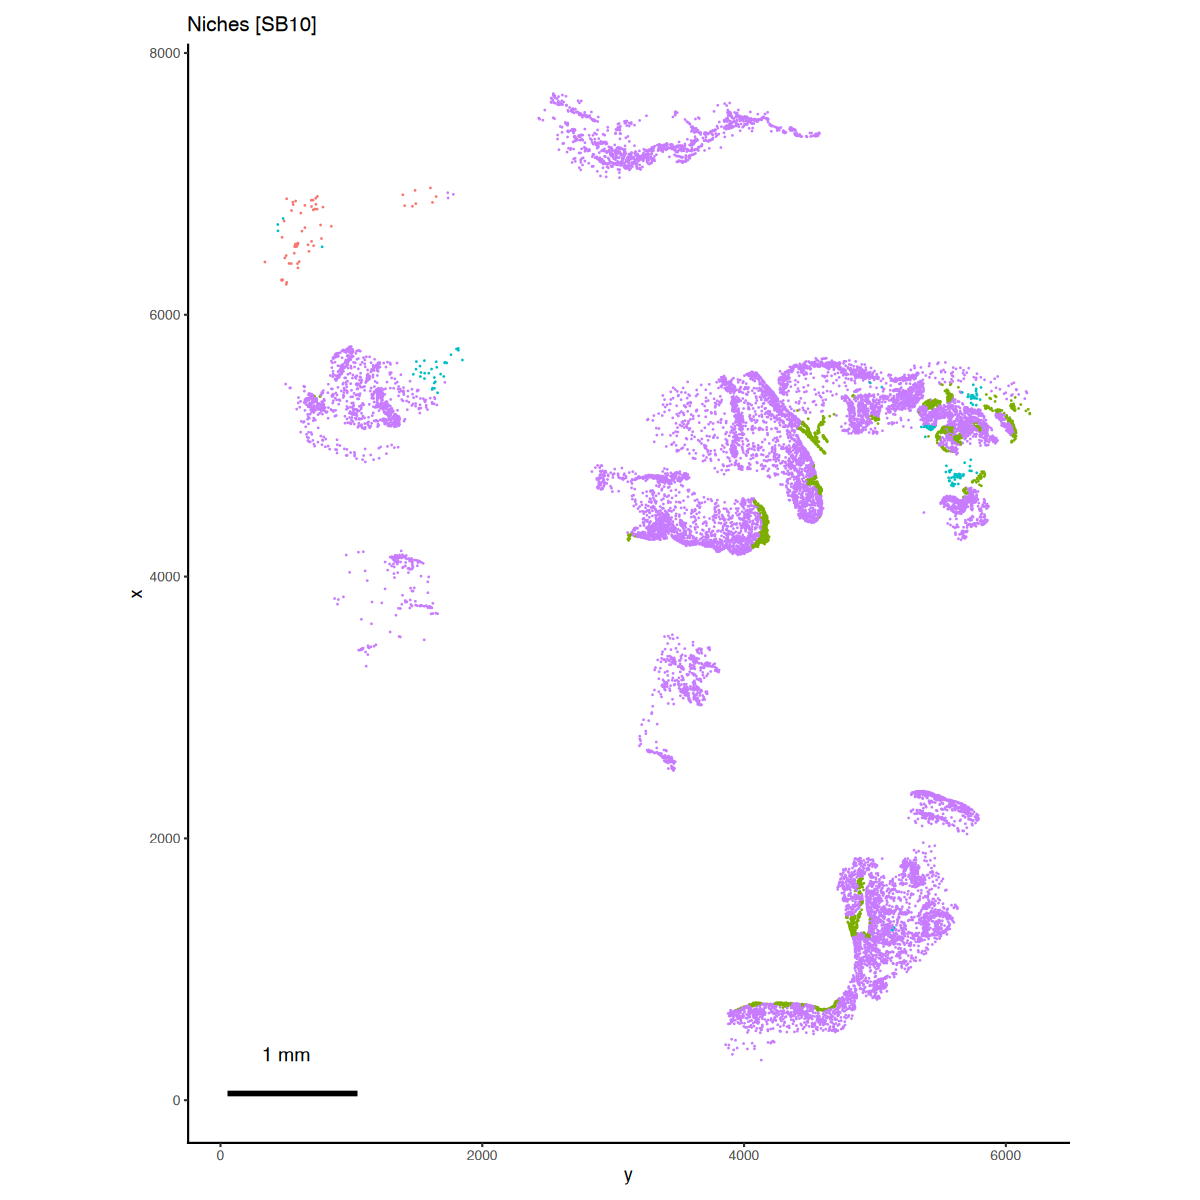

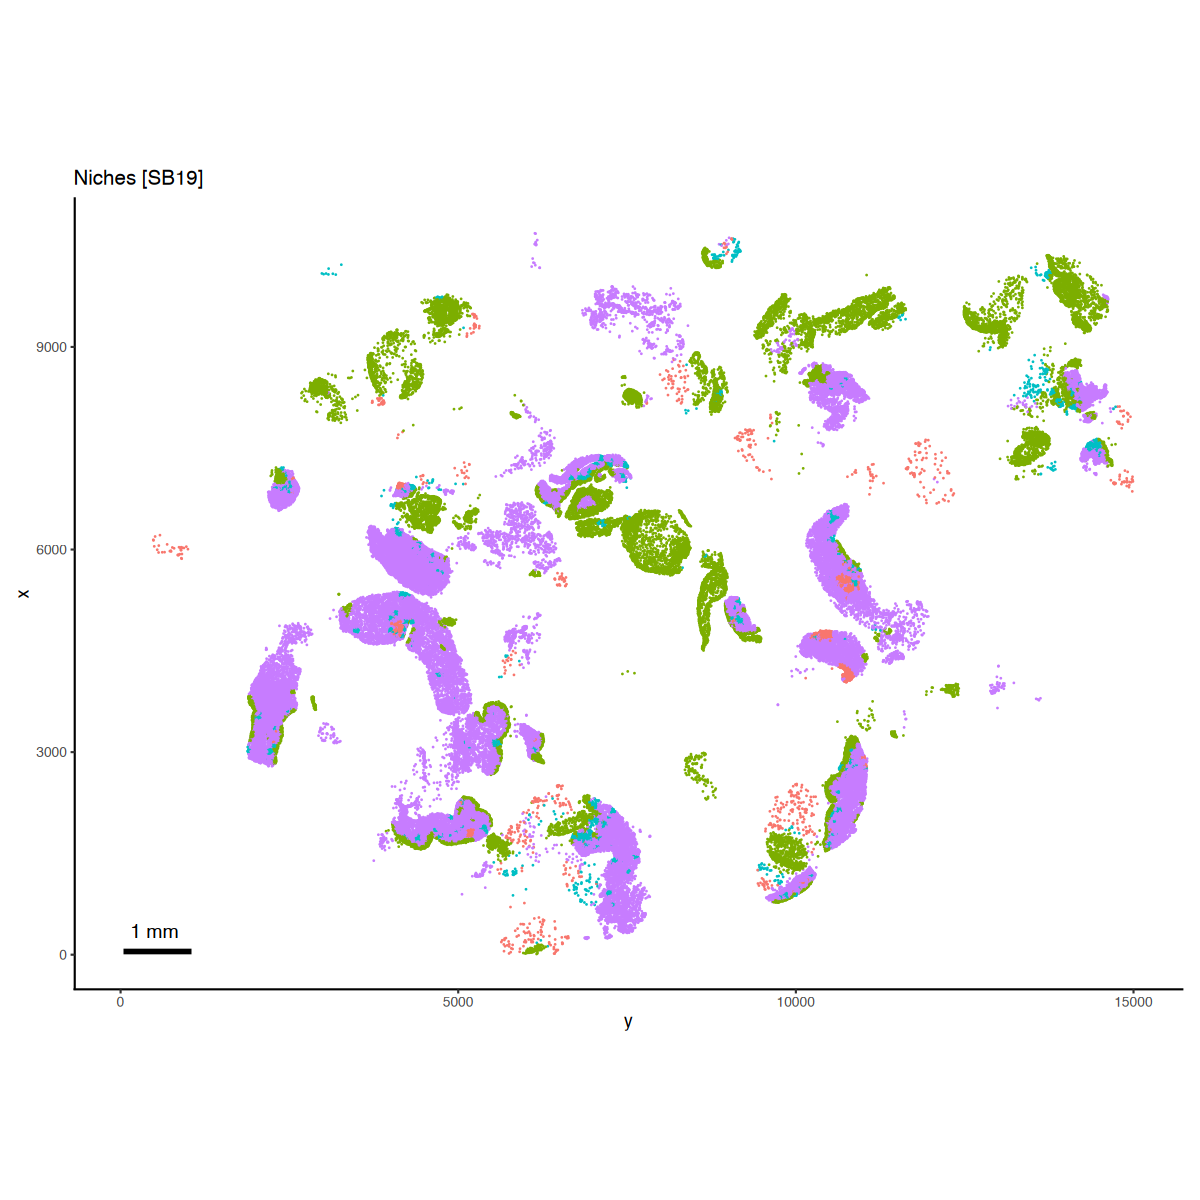

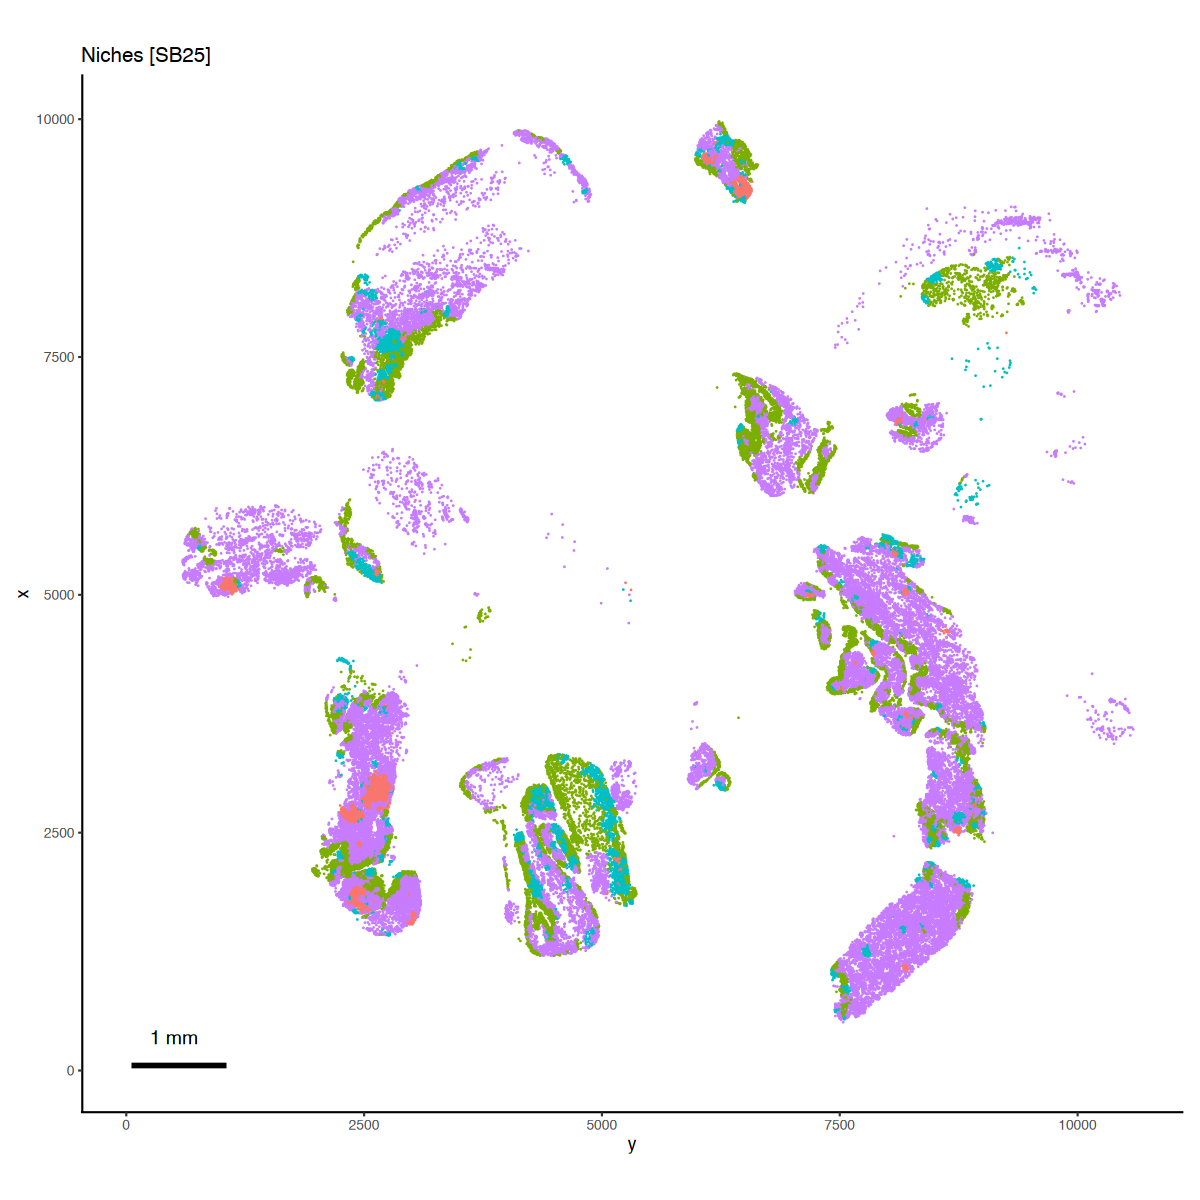

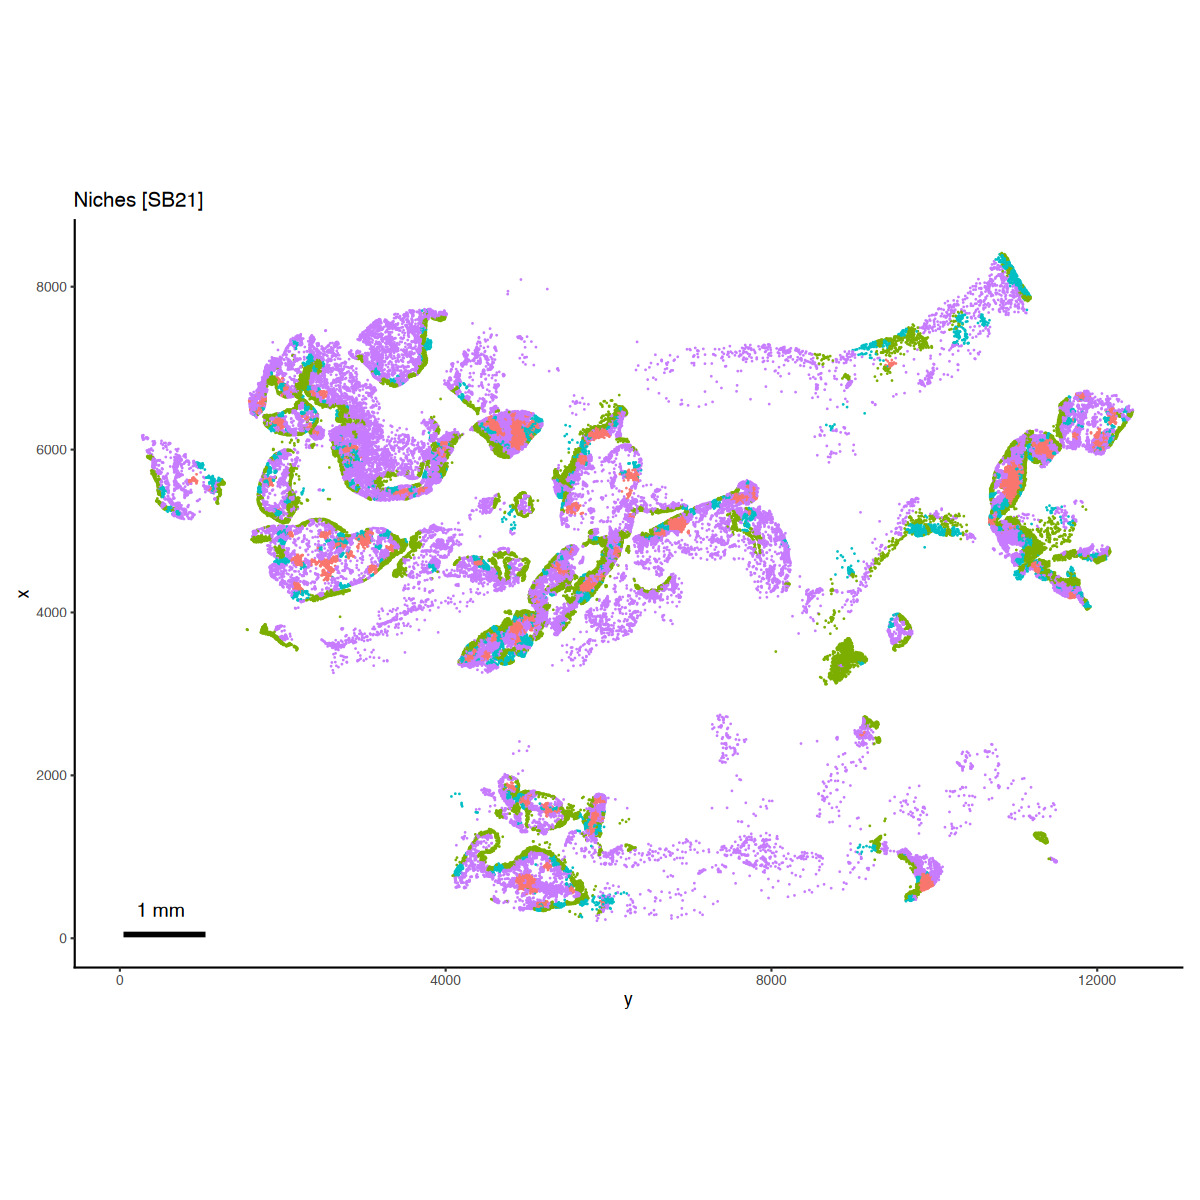

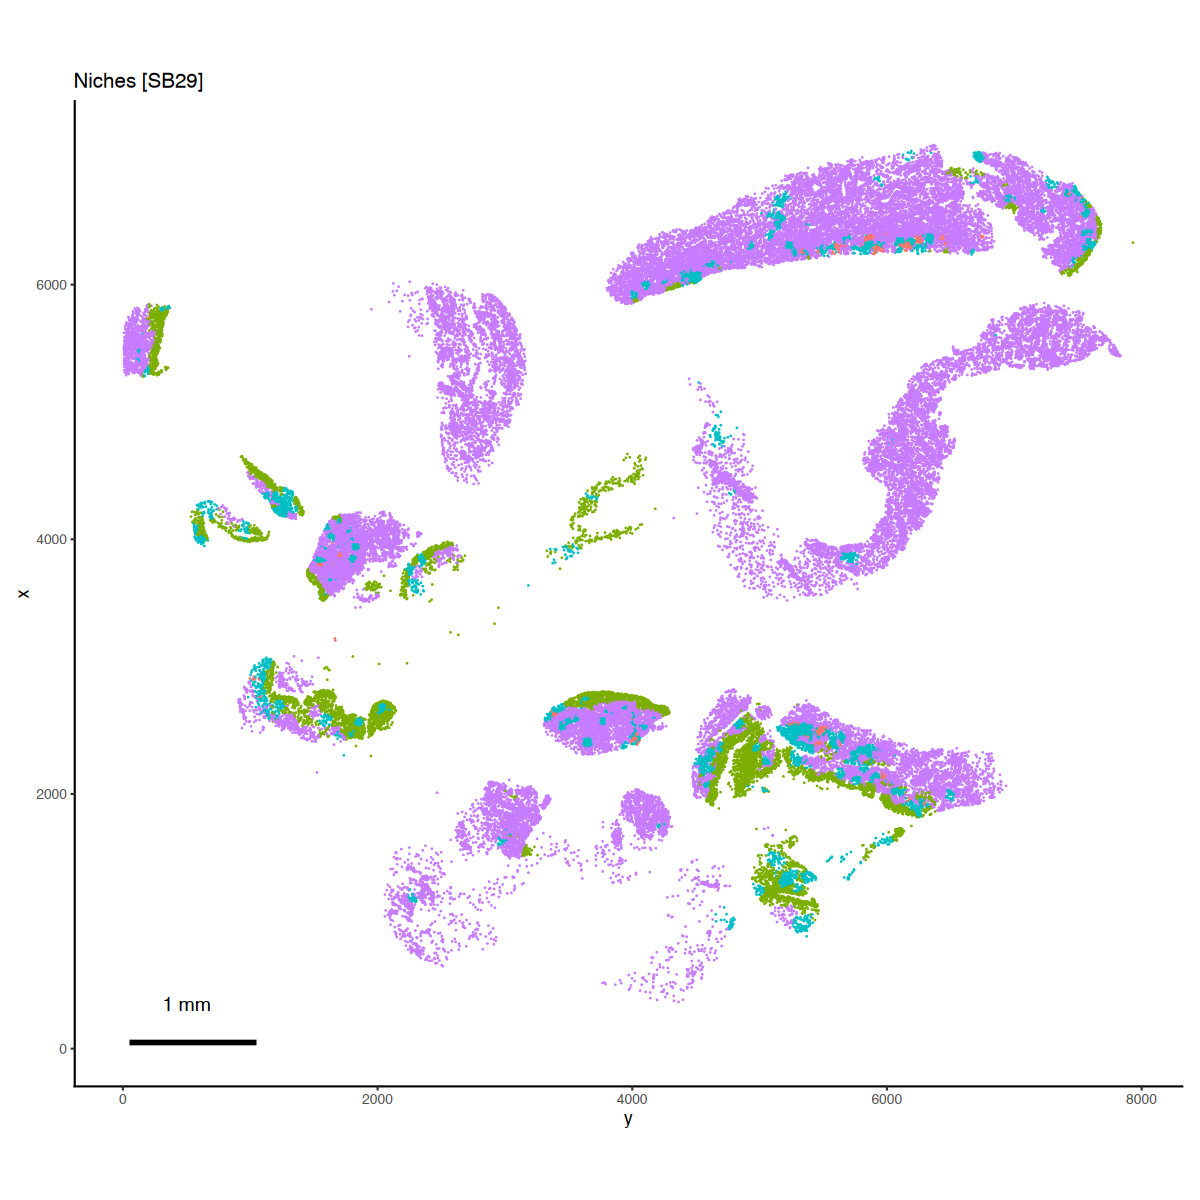

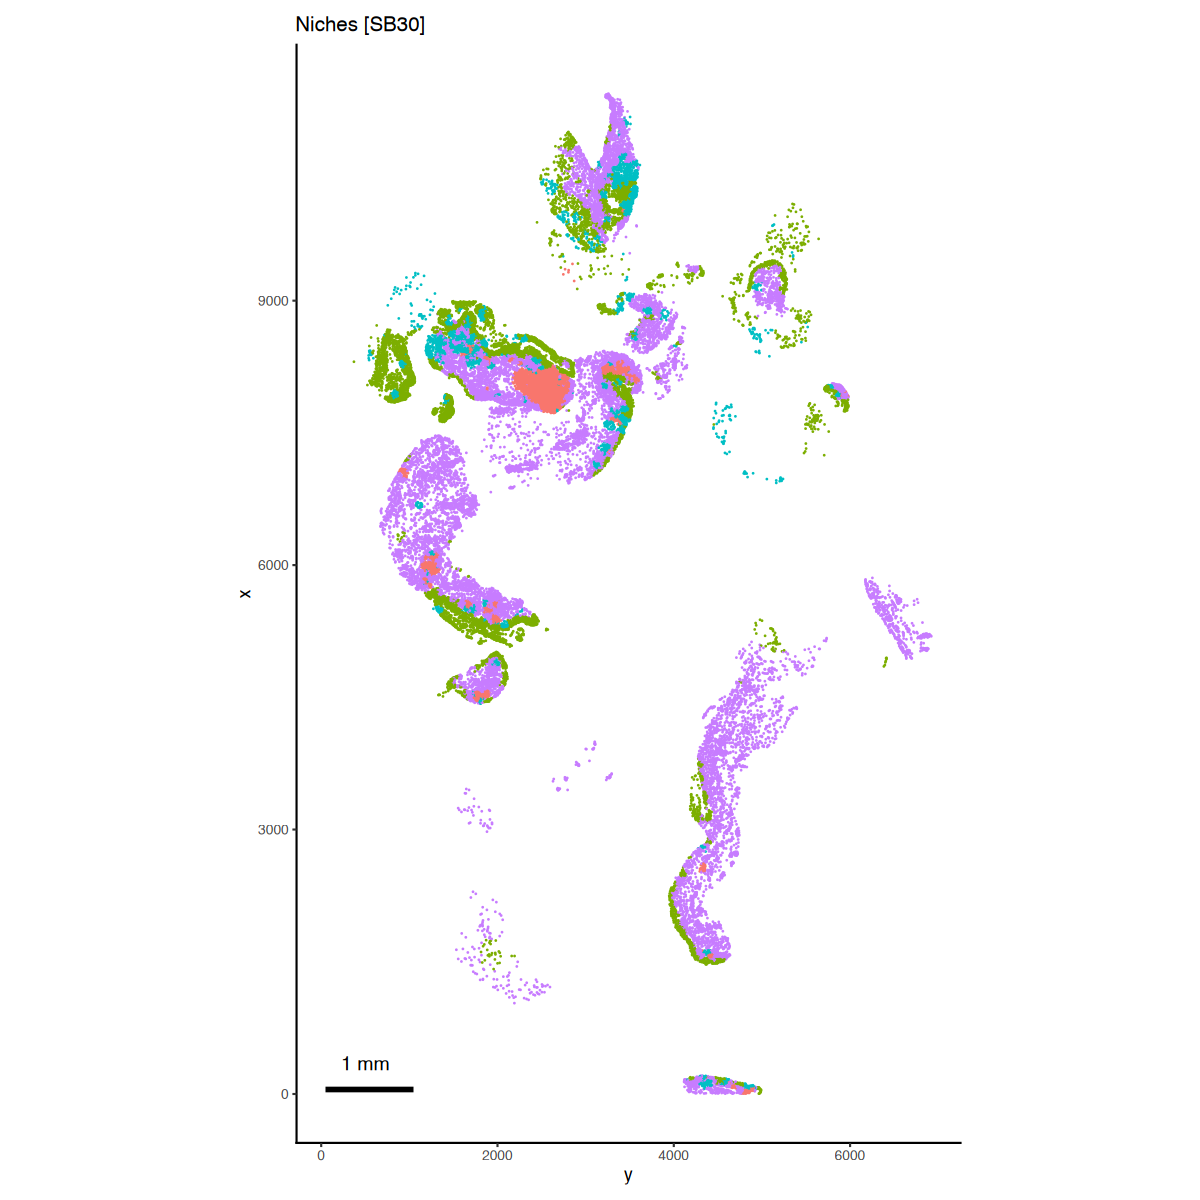

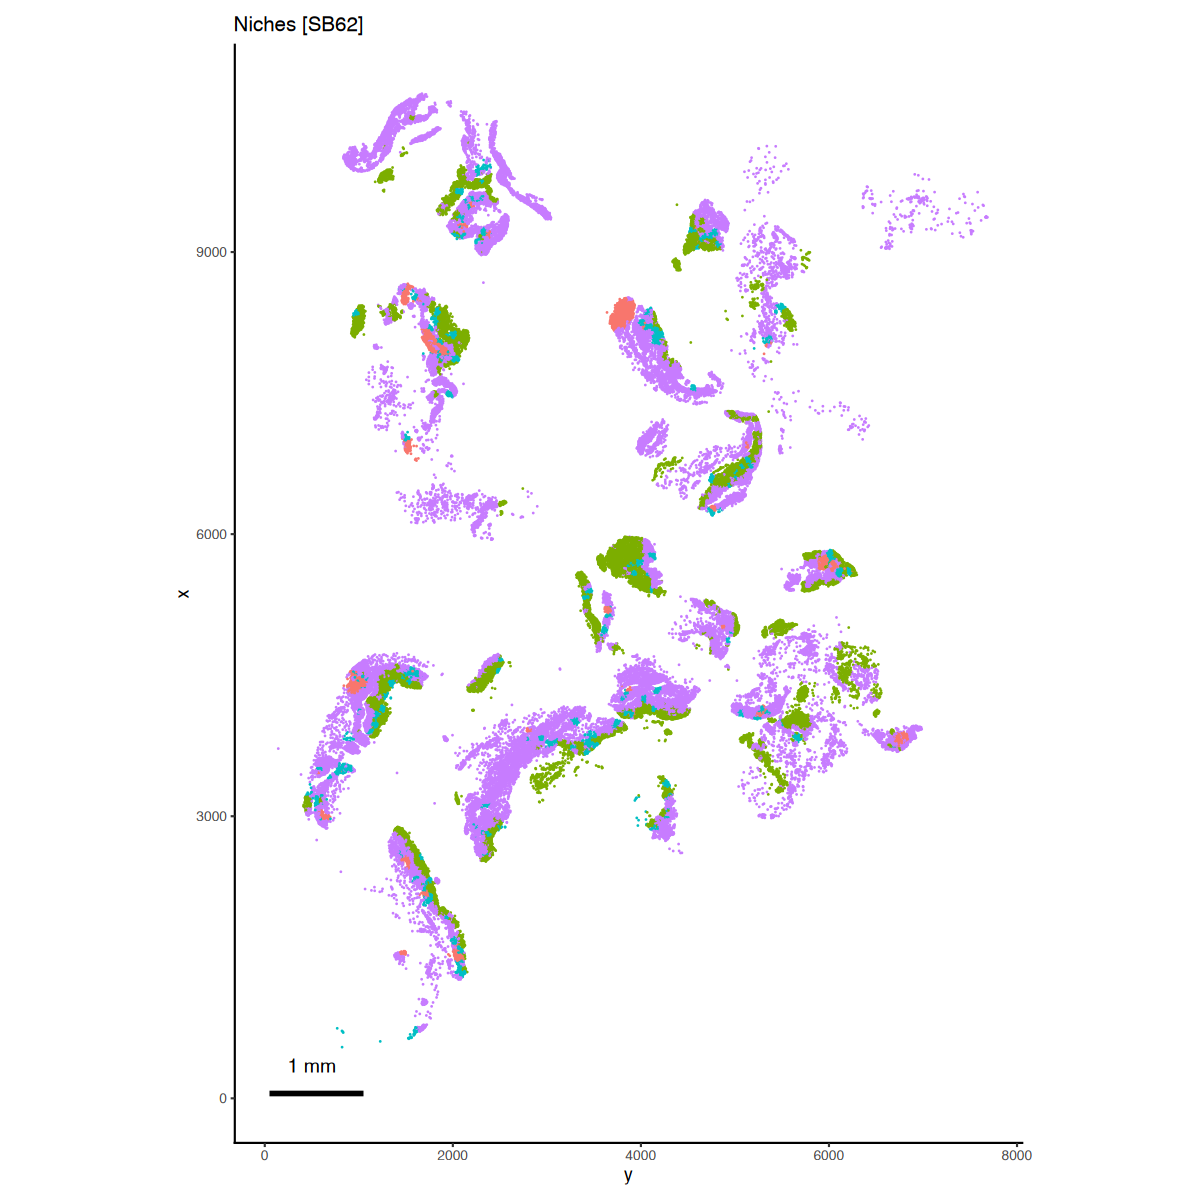

In [10]:
options(repr.plot.width = 10, repr.plot.height = 10)

for (name in names(ste@images)) {
  g = ImageDimPlot(ste, 
                   size = 0.5, 
                   dark.background = F,
                   fov = name) & 
    ggtitle(paste0("Niches [",name,"]")) & 
    theme_classic2(base_size = 10) &
    theme(legend.text = element_text(size = 10),
          legend.title = element_blank(),
          legend.position = "none") &
    annotate("segment", x = 50, xend = 1050, 
             y = 50, yend = 50, 
             color = "black", size = 1.2) &
    annotate("text", x = 500, y = 350, 
             label = "1 mm", size = 4)
  plot(g)
}
